# Fuentes

En este notebook buscamos la unión de varias fuentes y su resultado para poder empezar a trabajar el dataframe. En este caso no ha sido necesario una unión entre varias fuentes pero si la selección de ciertas columnas.

# Librerías

In [44]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.set_option('display.max_columns', 500)
sns.set_theme(font="Verdana", rc={
    'axes.facecolor': '#E9F1F7',     # Fondo de los ejes: Azul claro pastel
    'figure.facecolor': '#FFFEF7',   # Fondo de la figura: Azul más suave
    'axes.labelcolor': '#1F4E79',    # Color de las etiquetas de los ejes: Azul profundo
    'axes.titlecolor': '#1F4E79',    # Color del título: Azul profundo      # Color de los ticks del eje y: Azul profundo        # Color del texto: Azul profundo
})

In [35]:
df = pd.read_excel('../data/raw/Patients Data ( Used for Heart Disease Prediction ).xlsx', index_col=0)

In [36]:
df.head(5)

,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
PatientID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,0,1,1,0,0,0,1,Yes,0,0,0,1,0,0,Former smoker,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,0,0,0,0,0,0,1,No,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,0,0,0,0,0,0,1,Yes,0,0,0,0,0,0,Former smoker,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,Never smoked,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237630 entries, 1 to 237630
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      237630 non-null  object 
 1   Sex                        237630 non-null  object 
 2   GeneralHealth              237630 non-null  object 
 3   AgeCategory                237630 non-null  object 
 4   HeightInMeters             237630 non-null  float64
 5   WeightInKilograms          237630 non-null  float64
 6   BMI                        237630 non-null  float64
 7   HadHeartAttack             237630 non-null  int64  
 8   HadAngina                  237630 non-null  int64  
 9   HadStroke                  237630 non-null  int64  
 10  HadAsthma                  237630 non-null  int64  
 11  HadSkinCancer              237630 non-null  int64  
 12  HadCOPD                    237630 non-null  int64  
 13  HadDepressiveDisorder      237630 

Text(0.5, 1.0, 'Balance de pacientes con ACV')

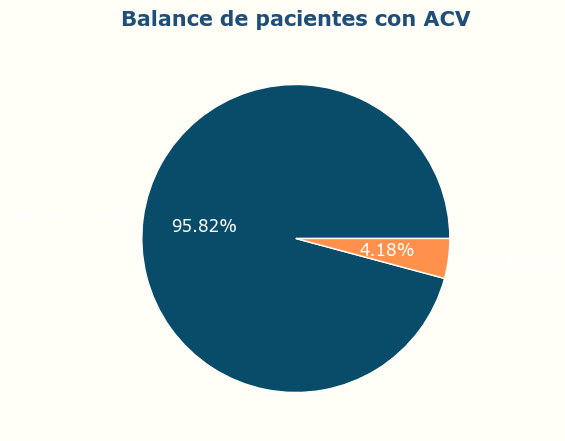

In [38]:
des_stroke = df['HadStroke'].value_counts()
plt.figure(figsize=(5,5))
#top_5_genres = indie_genres.nlargest(5)

plt.pie(des_stroke.values,
        labels=["No han tenido", "Han tenido"],
        autopct='%1.2f%%', colors=["#094C69", "#FF914d"], 
        textprops={'color': '#FFFFFF', 'fontsize': 12});
plt.title("Balance de pacientes con ACV",fontsize= 15, weight="bold", pad=15)

In [39]:
# Al ser tantos registros que tienen accidente cerebral 0, vamos a descartar el 90% para poder trabajar y balancear el modelo
condition_rows = df[df['HadStroke'] == 0]
rows_to_drop_count = int(0.93 * len(condition_rows))
drop_indices = condition_rows.sample(n=rows_to_drop_count, random_state=1).index
df = df.drop(drop_indices)

Text(0.5, 1.0, 'Balance de pacientes con ACV')

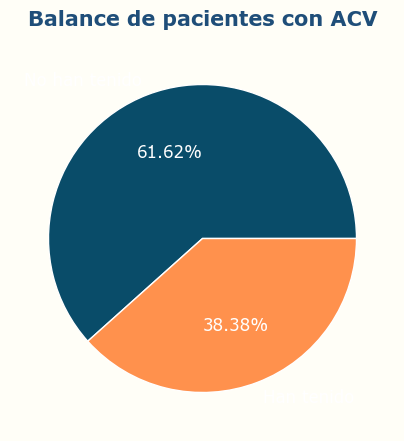

In [41]:
des_stroke = df['HadStroke'].value_counts()
plt.figure(figsize=(5,5))
#top_5_genres = indie_genres.nlargest(5)

plt.pie(des_stroke.values,
        labels=["No han tenido", "Han tenido"],
        autopct='%1.2f%%', colors=["#094C69", "#FF914d"], 
        textprops={'color': '#FFFFFF', 'fontsize': 12});
plt.title("Balance de pacientes con ACV",fontsize= 15, weight="bold", pad=15)

In [46]:
df.shape[0]

25868

In [43]:
df.drop(columns=['CovidPos', 'HighRiskLastYear', 'TetanusLast10Tdap', 'PneumoVaxEver', 'FluVaxLast12', 'HIVTesting', 'ChestScan', 'ECigaretteUsage', 'DifficultyErrands', 'DifficultyDressingBathing', 'DifficultyWalking','DifficultyConcentrating','BlindOrVisionDifficulty', 'DeafOrHardOfHearing', 'HadSkinCancer', 'HadAsthma','State'], inplace=True)
df.to_csv('../data/raw/healthcare-dataset-raw.csv', index=False)

###### La fuente de datos se encuentra en Kaggle